## Docker specific configurations

Prepare python path

In [1]:
from sys import path
from pathlib import Path
path.append(str(Path("../../").resolve()))

## Prepare mesh

Generate mesh outside of the docker using the following commands:
```bash
gmsh mesh.geo -2
../../tools/convert_msh.py mesh.msh mesh.xdmf
```

## Solution preparation

Import BeamImpedance2D module

In [2]:
import logging
import bi2d
from bi2d.materials import vacuum, beam, steel
import numpy as np

Assign material indices

In [3]:
beam.index = 1
vacuum.index = 2
steel.index = 3

Setup mesh and materials

In [4]:
m = bi2d.Mesh("mesh.xdmf")
mc = bi2d.MaterialMap(m, [beam, vacuum, steel])

Configure solution

In [5]:
solution = bi2d.Solution(mc, Hcurl_order=2, H1_order=2)

Enable info level logging

In [6]:
solution.logger.setLevel(logging.INFO)

## Solve and visualize fields

Solve and visualize the fields for one frequency point

In [7]:
solution.get_z([1e5], beta=0.1, source_function=bi2d.SourceFunction.MONOPOLE)

INFO:bi2d.solution:Solving for f=1.00e+05, β=0.10


array([[ 1.00000000e+05,  2.37335570e-03, -1.97280006e+01]])

`sum_fields` function allows us to summate rotational and irrotational fields for visualization

In [8]:
solution.sum_fields()
solution.save("solution.xdmf")

Use `paraview solution.xdmf` command to visualize solution from desktop. Note, that `paraview` needs both `solution.xdmf` and `solution.h5` files.

## Calculate monopole impedance

Calculate impedance in frequency range and save the results

In [9]:
solution.logger.setLevel(logging.WARNING)

In [10]:
%%time

data01 = solution.get_z(np.logspace(5, 12, num=30), beta=0.1, source_function=bi2d.SourceFunction.MONOPOLE)

CPU times: user 44.3 s, sys: 1.37 s, total: 45.7 s
Wall time: 45.7 s


In [11]:
%%time

data09 = solution.get_z(np.logspace(5, 12, num=30), beta=0.9, source_function=bi2d.SourceFunction.MONOPOLE)

CPU times: user 46.4 s, sys: 1.4 s, total: 47.8 s
Wall time: 47.8 s


## Plot monopole impedance

In [12]:
import pylab
pylab.rcParams['figure.figsize'] = [12, 8]

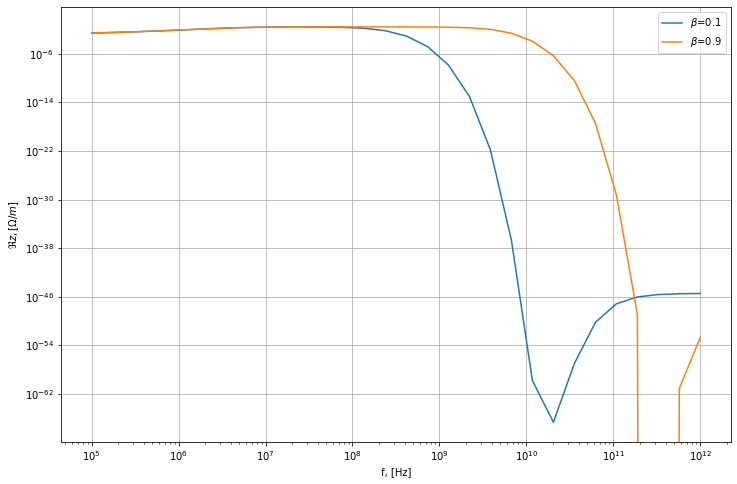

In [13]:
pylab.plot(data01[:,0], data01[:,1])
pylab.plot(data09[:,0], data09[:,1])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"$\Re{z}, [\Omega/m]$")
pylab.grid()
pylab.legend([r"$\beta$=0.1", r"$\beta$=0.9"])
pylab.show()

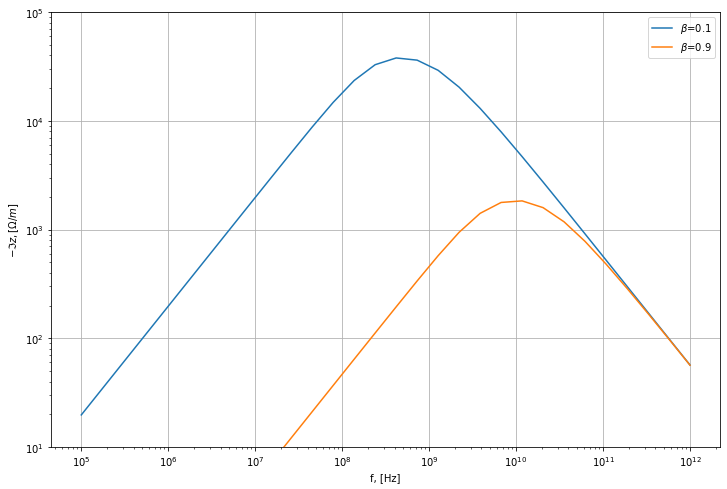

In [14]:
pylab.plot(data01[:,0], -data01[:,2])
pylab.plot(data09[:,0], -data09[:,2])
pylab.yscale("log")
pylab.xscale("log")
pylab.ylim((1e1, 1e5))
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"$-\Im{z}, [\Omega/m]$")
pylab.grid()
pylab.legend([r"$\beta$=0.1", r"$\beta$=0.9"])
pylab.show()

## Calculate dipole impedance

In [15]:
%%time

data01 = solution.get_z(np.logspace(5, 12, num=30), beta=0.1, source_function=bi2d.SourceFunction.DIPOLE)

CPU times: user 46.5 s, sys: 1.52 s, total: 48.1 s
Wall time: 48.4 s


In [16]:
%%time

data09 = solution.get_z(np.logspace(5, 12, num=30), beta=0.9, source_function=bi2d.SourceFunction.DIPOLE)

CPU times: user 46.1 s, sys: 1.47 s, total: 47.6 s
Wall time: 47.6 s


## Plot dipole impedance

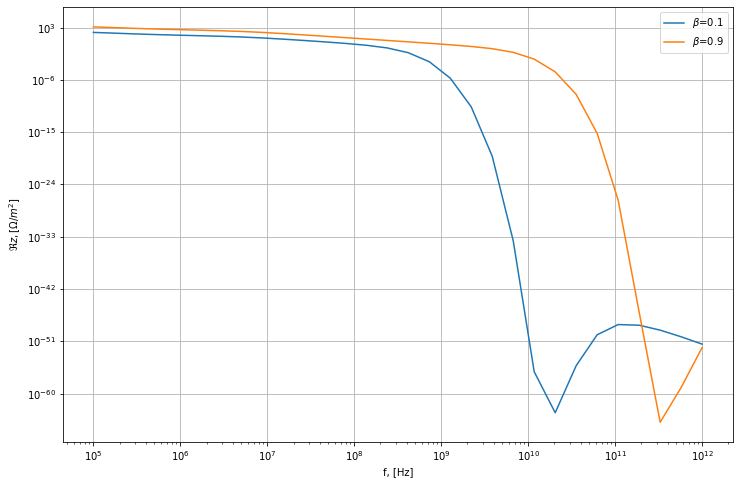

In [17]:
pylab.plot(data01[:,0], data01[:,1])
pylab.plot(data09[:,0], data09[:,1])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"$\Re{z}, [\Omega/m^2]$")
pylab.grid()
pylab.legend([r"$\beta$=0.1", r"$\beta$=0.9"])
pylab.show()

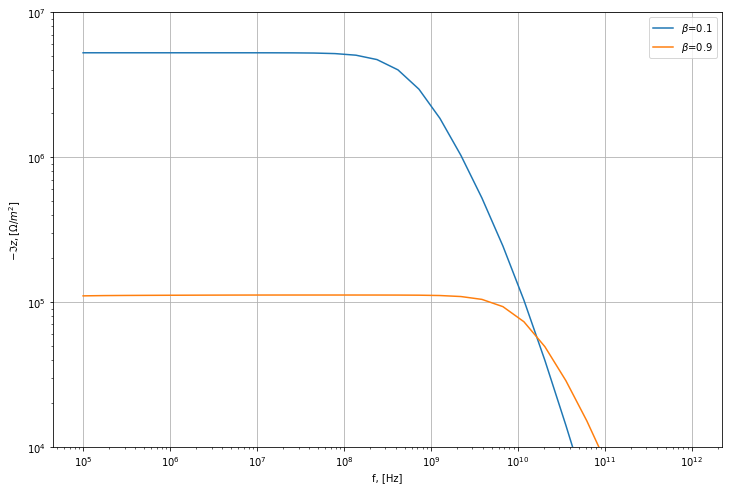

In [18]:
pylab.plot(data01[:,0], -data01[:,2])
pylab.plot(data09[:,0], -data09[:,2])
pylab.yscale("log")
pylab.xscale("log")
pylab.ylim((1e4, 1e7))
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"$-\Im{z}, [\Omega/m^2]$")
pylab.grid()
pylab.legend([r"$\beta$=0.1", r"$\beta$=0.9"])
pylab.show()